In [1]:
import pandas as pd
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-1-5b8eaed22451>:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
file = pd.read_csv('Advertising.csv')
file.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df = file.drop(['Unnamed: 0'],axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:

y = df.sales
x= df.drop('sales',axis = 1, inplace = False)



In [8]:
x


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [10]:
df.shape

(200, 4)

In [11]:
x.shape

(200, 3)

In [12]:
y.shape

(200,)

# The  relationship between ads and sales

In [13]:
df.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# How strong is that relationship

<AxesSubplot:>

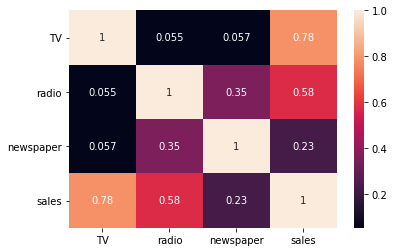

In [15]:
sns.heatmap(df.corr(),annot=True)

# Types of ads contribute to sales

In [16]:
x.dtypes

TV           float64
radio        float64
newspaper    float64
dtype: object

In [17]:

x.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [19]:
x.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[[ 'TV', 'radio', 'newspaper']], df['sales'], test_size=0.3, random_state=109)

In [22]:
#Creating the model
linearRegr =  LinearRegression()
linearRegr.fit(X_train, y_train)
y_pred = linearRegr.predict(X_test)

In [23]:
#Saving the Model
pickle_out = open("d7try1.pkl", "wb") 
pickle.dump(linearRegr, pickle_out) 
pickle_out.close()

In [24]:
pwd

'c:\\myenvt\\Scripts\\Course Materials ML ICFOSS\\d7 try'